# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [56]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


656

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
'''  PULL DATA FROM API
Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude
'''

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



# List for holding the following data 

weather_data = []


for city in cities[0:635]:
    response = requests.get(query_url + city).json()
    try:
        
        pulledCities = (response['name'])
        temp=(response['main']['temp'])
        humidity=(response['main']['humidity'])
        cloudiness=(response['clouds']['all'])
        windSpeed=(response['wind']['speed'])
        lat=((response['coord']['lat']))
        lng=(response['coord']['lon'])
        country=(response['sys']['country'])
        
        weather_data.append({
        "City":pulledCities,
        "Country":country,
        "Latitude": lat,
        "Longitude": lng,
        "Temperature (F)":temp,
        "Humidity (%)":humidity,
        "Cloudiness (%)":cloudiness,
        "Wind Speed (mph)": windSpeed})
        print(f"{city}Did work ")
        
    except (KeyError, IndexError):
        print(f"{city} did not work")
        


tselinnoyeDid work 
uclueletDid work 
mar del plataDid work 
omboueDid work 
sorongDid work 
ahuimanuDid work 
malegaonDid work 
lebuDid work 
arraial do caboDid work 
goderichDid work 
klaksvikDid work 
minabDid work 
lompocDid work 
ushuaiaDid work 
erenhotDid work 
alyangulaDid work 
punta arenasDid work 
taburao did not work
napaDid work 
sitkaDid work 
illoqqortoormiut did not work
tecoanapaDid work 
port hedlandDid work 
east londonDid work 
meulabohDid work 
bluffDid work 
zyryankaDid work 
kintampoDid work 
butaritariDid work 
la pazDid work 
vainiDid work 
tasiilaqDid work 
albanyDid work 
vilhenaDid work 
kodiakDid work 
cape townDid work 
labutta did not work
bethelDid work 
catalaoDid work 
dibaya did not work
hovdDid work 
buqayq did not work
sovetskiyDid work 
georgetownDid work 
hithadhooDid work 
hermanusDid work 
busseltonDid work 
kakaDid work 
boa vistaDid work 
cabedeloDid work 
qaqortoqDid work 
kalulushiDid work 
castroDid work 
yellowknifeDid work 
port macquarie

cuiluanDid work 
novoyegoryevskoye did not work
santa mariaDid work 
steamboat springsDid work 
porto novoDid work 
bubaqueDid work 
sinnamaryDid work 
algheroDid work 
mollendoDid work 
umm kaddadahDid work 
antofagastaDid work 
iracouboDid work 
stornowayDid work 
vestmannaeyjarDid work 
itomanDid work 
san ramon de la nueva oranDid work 
najranDid work 
noumeaDid work 
bichuraDid work 
opmeerDid work 
jalingoDid work 
cherskiyDid work 
bur gabo did not work
progresoDid work 
kaeoDid work 
erzinDid work 
surat thaniDid work 
kribiDid work 
shiheziDid work 
namatanaiDid work 
tiksiDid work 
horodnyaDid work 
kloulklubedDid work 
yumenDid work 
whitehorseDid work 
sisimiutDid work 
mizan teferiDid work 
gatDid work 
waingapuDid work 
tucumanDid work 
walvis bayDid work 
swantonDid work 
aykhalDid work 
dawsonDid work 
mauaDid work 
dongshengDid work 
lantawanDid work 
tumannyy did not work
rio gallegosDid work 
narsaqDid work 
manzil jamil did not work
bayshore gardensDid work 
aklavik

In [10]:

print(json.dumps(response,indent =4,sort_keys=True))



{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -6.84,
        "lon": -79.93
    },
    "dt": 1592364270,
    "id": 3693584,
    "main": {
        "feels_like": 58.84,
        "grnd_level": 1014,
        "humidity": 88,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 64.22,
        "temp_max": 64.22,
        "temp_min": 64.22
    },
    "name": "Pimentel",
    "sys": {
        "country": "PE",
        "sunrise": 1592306929,
        "sunset": 1592349140
    },
    "timezone": -18000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 167,
        "speed": 15.75
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
print(weather_data)


[{'city': 'Aginskoye', 'Country': 'RU', 'Latitude': 51.1, 'Longitude': 114.53, 'Temperature (F)': 71.06, 'Humidity (%)': 58, 'Cloudiness (%)': 100, 'Wind Speed (mph)': 14.29}, {'city': 'General Roca', 'Country': 'AR', 'Latitude': -39.03, 'Longitude': -67.58, 'Temperature (F)': 39.2, 'Humidity (%)': 86, 'Cloudiness (%)': 21, 'Wind Speed (mph)': 0.43}, {'city': 'Biak', 'Country': 'ID', 'Latitude': -0.91, 'Longitude': 122.88, 'Temperature (F)': 83.21, 'Humidity (%)': 72, 'Cloudiness (%)': 87, 'Wind Speed (mph)': 9.35}, {'city': 'Mar del Plata', 'Country': 'AR', 'Latitude': -38, 'Longitude': -57.56, 'Temperature (F)': 56.55, 'Humidity (%)': 100, 'Cloudiness (%)': 90, 'Wind Speed (mph)': 4.7}, {'city': 'Castro', 'Country': 'BR', 'Latitude': -24.79, 'Longitude': -50.01, 'Temperature (F)': 57.18, 'Humidity (%)': 97, 'Cloudiness (%)': 41, 'Wind Speed (mph)': 7.96}, {'city': 'Cherskiy', 'Country': 'RU', 'Latitude': 68.75, 'Longitude': 161.3, 'Temperature (F)': 79.29, 'Humidity (%)': 24, 'Cloudi

In [78]:
weather_data_df = pd.DataFrame(weather_data)

weather_data_df.to_csv(output_data_file, index=False, header=True)
weather_data_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Tselinnoye,RU,53.08,85.67,65.07,69,76,9.98
1,Ucluelet,CA,48.93,-125.55,57.99,82,0,1.01
2,Mar del Plata,AR,-38.00,-57.56,56.32,100,90,4.70
3,Omboué,GA,-1.57,9.26,72.91,92,78,6.26
4,Sorong,ID,-0.88,131.25,84.18,77,41,7.40
...,...,...,...,...,...,...,...,...
578,Noyabrsk,RU,63.20,75.45,47.66,92,100,15.08
579,Chūru,IN,28.30,74.95,105.15,10,3,10.29
580,Puquio,PE,-14.70,-74.13,48.34,54,1,3.04
581,Elizabeth City,US,36.29,-76.25,65.28,100,90,16.11


In [59]:
weather_data_df.count()

city                583
Country             583
Latitude            583
Longitude           583
Temperature (F)     583
Humidity (%)        583
Cloudiness (%)      583
Wind Speed (mph)    583
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [79]:
from datetime import date
# Define a function for scatter plot
def scatter_plot(df,para_1,para_2):
    plt.figure(figsize=(7,4))
    plt.scatter(df[para_1],df[para_2], marker=None, color='C0', 
            linewidths=0.3, edgecolors="black")
    today = date.today()
    plt.title("Latitude vs. " + para_2 + ", " + str(today))
    plt.xlabel(para_1)
    plt.ylabel(para_2)
    plt.grid()
    output_plot = '../output_data/'+para_1+'_'+para_2 +'.png'
    plt.savefig(output_plot, dpi=300,bbox_inches='tight')

#### Latitude vs. Temperature Plot

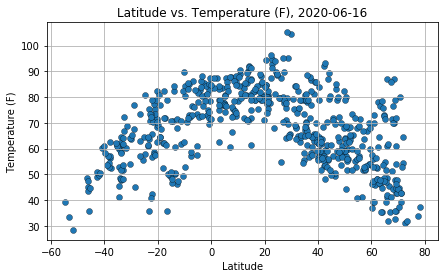

In [80]:

para_1 = 'Latitude'
para_2 = "Temperature (F)"
scatter_plot(weather_data_df,para_1,para_2)

#### Latitude vs. Humidity Plot

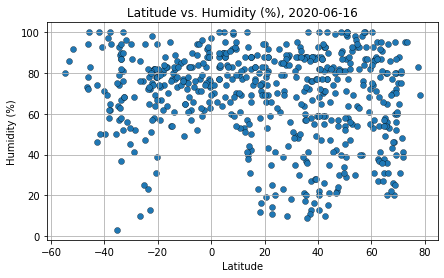

In [61]:
para_1 = 'Latitude'
para_2 = "Humidity (%)"
scatter_plot(weather_data_df,para_1,para_2)

#### Latitude vs. Cloudiness Plot

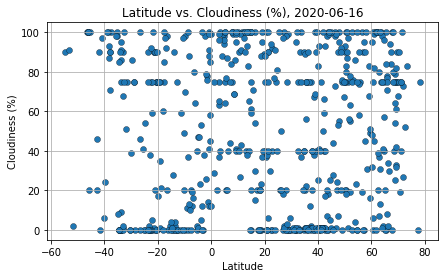

In [62]:
para_1 = 'Latitude'
para_2 = "Cloudiness (%)"
scatter_plot(weather_data_df,para_1,para_2)

#### Latitude vs. Wind Speed Plot

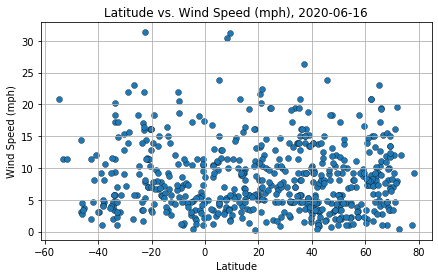

In [63]:
para_1 = 'Latitude'
para_2 = "Wind Speed (mph)"
scatter_plot(weather_data_df,para_1,para_2)

## Linear Regression

In [81]:
# OPTIONAL: Create a function to create Linear Regression plots

def scatter_plot_hemispheres(df,para_1,para_2):
    fig = plt.figure(figsize=(7,4))
    plt.scatter(df[para_1],df[para_2], marker=None, color='C0', 
            linewidths=0.3, edgecolors="black")
    today = date.today()
    plt.title("Latitude vs. " + para_2 + ", " + str(today))
    plt.xlabel(para_1)
    plt.ylabel(para_2)
    plt.grid()
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[para_1],df[para_2])
    regress_values = df[para_1] * slope + intercept
    plt.plot(df[para_1],regress_values,"r-")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    text =(line_eq + ', R$^{2}$ = ' + str(round(rvalue,2)))
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.8, edgecolor='none')        
    fig.text(0.15,0.17, text, size=12,bbox=props,fontsize=14,color ='red')
    
    if df['Latitude'].iloc[1] > 0:
        output_plot = '../output_data/NorthHemisphere_'+para_1+'_'+para_2 +'.png'
    else:
        output_plot = '../output_data/SouthHemisphere_'+para_1+'_'+para_2 +'.png'
    plt.savefig(output_plot, dpi=300,bbox_inches='tight')

In [82]:
# Create Northern and Southern Hemisphere DataFrames
df_n = weather_data_df[weather_data_df['Latitude']>0]
df_s = weather_data_df[weather_data_df['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

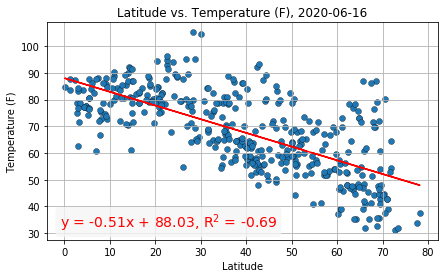

In [68]:
para_1 = 'Latitude'
para_2 = "Temperature (F)"
scatter_plot_hemispheres(df_n,para_1,para_2)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

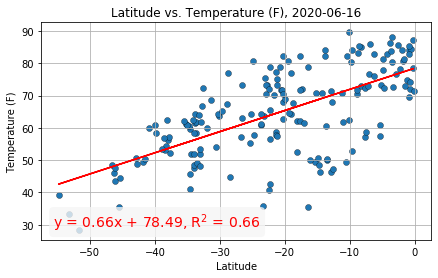

In [69]:
para_1 = 'Latitude'
para_2 = "Temperature (F)"
scatter_plot_hemispheres(df_s,para_1,para_2)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

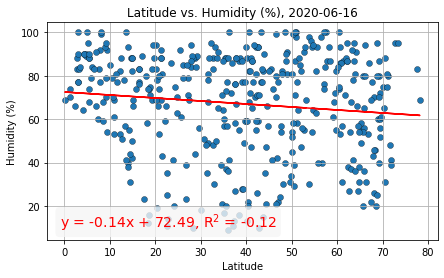

In [70]:
para_1 = 'Latitude'
para_2 = "Humidity (%)"
scatter_plot_hemispheres(df_n,para_1,para_2)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

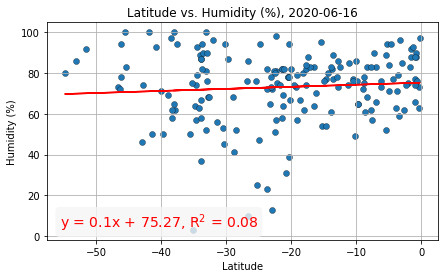

In [71]:
para_1 = 'Latitude'
para_2 = "Humidity (%)"
scatter_plot_hemispheres(df_s,para_1,para_2)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

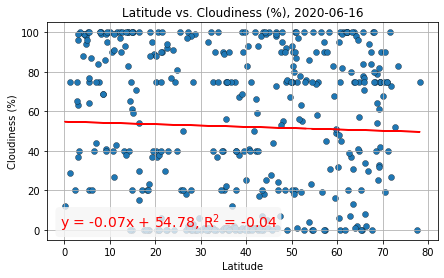

In [72]:
para_1 = 'Latitude'
para_2 = "Cloudiness (%)"
scatter_plot_hemispheres(df_n,para_1,para_2)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

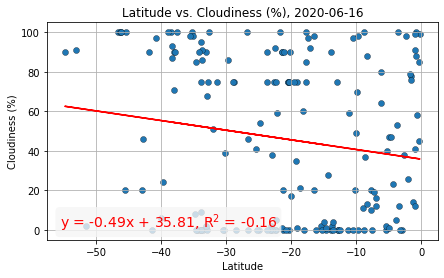

In [73]:
para_1 = 'Latitude'
para_2 = "Cloudiness (%)"
scatter_plot_hemispheres(df_s,para_1,para_2)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

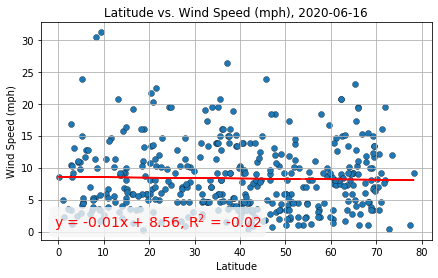

In [74]:
para_1 = 'Latitude'
para_2 = "Wind Speed (mph)"
scatter_plot_hemispheres(df_n,para_1,para_2)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

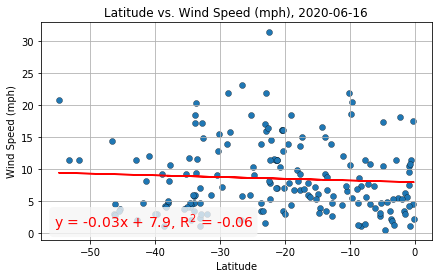

In [75]:

para_1 = 'Latitude'
para_2 = "Wind Speed (mph)"
scatter_plot_hemispheres(df_s,para_1,para_2)

In [76]:
weather_data_df['Latitude'].iloc[1]


48.93